Algunas pruebas para generar figuras interactivas.

In [1]:
import math
import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.patches import Rectangle
# from matplotlib.widgets import Slider, Button

from libem import equipotencialesPuntualesInteractivo


# import matplotlib.animation
# # from IPython.display import HTML


In [2]:
%matplotlib widget

In [3]:
def V(x,y,z,Q):
    """Calcula potencial eléctrico en V.
    Ingresar valores de x,y,z en metros y q en coulomb.
    Q es una lista de la forma:
    Q = [
        [q1,x1,y1,z1],
        [q2,x2,y2,z2],
        ...
        [qN,xN,yN,zN]
    ]
    """
    k = 9E9   #Constante de Coulomb en las unidades correspondientes.

    V = 0
    for qi in Q:
        r = ((x - qi[1])**2 + (y - qi[2])**2 + (z - qi[3])**2)**(1/2)
        V = V + k * qi[0] / r

    return V

/tmp/ipykernel_4927/4088337312.py:17: RuntimeWarning: divide by zero encountered in divide
  V = V + k * qi[0] / r


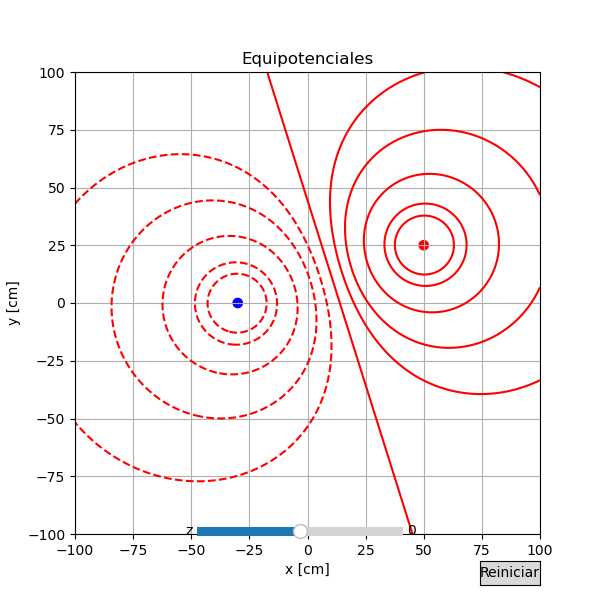

In [4]:
Q = [
    [-1E-9,-0.3,0,0],
    [1E-9,0.5,0.25,0],
]

levels = [-60, -40, -20, -10, -5, 0, 5, 10, 20, 40, 60]

equipotencialesPuntualesInteractivo(Q, V, levels=levels, z = 0)

In [5]:
# Formatter para agregar V a las etiquetas de las equipotenciales.
def fmtV(x):
    return f"{x}V"


/tmp/ipykernel_4557/4088337312.py:17: RuntimeWarning: divide by zero encountered in divide
  V = V + k * qi[0] / r


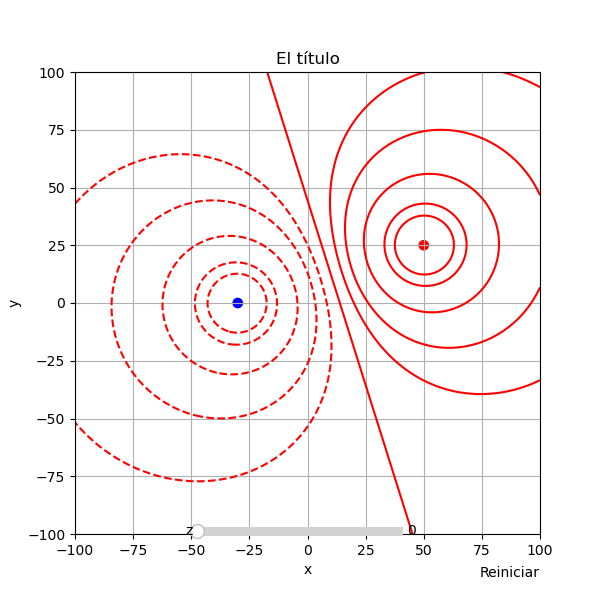

In [6]:

xlabel = 'x'
ylabel = 'y'
dq = 0.02
dim = 100
z=0
titulo = 'El título'
figsize = (6,6)
fig, ax = plt.subplots(1, 1, figsize=figsize,facecolor=(1, 1, 1) )
ax.set_title(titulo)

for carga in Q:
    q, xq, yq, zq = carga
    # Different colors for positive and negative charges.
    if q>0:
        color = 'red'
    else:
        color = 'blue'
    # Check if the charge has to be drawn or not.
    # if isinstance(x, float) or isinstance(x, int):
    #     if xq == x:
    #         circ = plt.Circle((yq*100,zq*100), dq*dim, color=color)
    #         ax.add_patch(circ)
    # elif isinstance(y, float) or isinstance(y, int):
    #     if yq == y:
    #         circ = plt.Circle((xq*100,zq*100), dq*dim, color=color)
    #         ax.add_patch(circ)
    # elif isinstance(z, float) or isinstance(z, int):
    if zq == z:
        circ = plt.Circle((xq*100,yq*100), dq*dim, color=color)
        ax.add_patch(circ)

x = np.arange(-dim, dim+1)
y = np.arange(-dim, dim+1)
X, Y = np.meshgrid(x, y)
Z = X*0 + z
Vmat = V(X/100,Y/100,Z,Q)  # Convertir X, Y a metro.

CS2 = plt.contour(X, Y, Vmat, levels = levels, colors = 'red', alpha=1)
contour_axis = plt.gca()

# ax.clabel(CS2, inline=True, fmt=fmtV, fontsize=10)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid()





# line, = ax.plot(z, yb, color='blue')
# ax.plot(z, ya, color='orange')
# ax.margins(x=0)
# #hide x-axis
# ax.get_xaxis().set_visible(False)
# ax.get_yaxis().set_visible(False)

# R1 = Rectangle((0, -0.6), L, 1.2, alpha=0.3, color='cyan')
# R2 = Rectangle((0, -0.6), L, 1.2, fill=False, ec='black')
# ax.add_patch(R1)
# ax.add_patch(R2)
# fig.suptitle("Ejercicio 2.3")


# adjust the main plot to make room for the sliders
# fig.subplots_adjust(left=0.1, bottom=0.2)

# Plot axis starts at position 0.1 and has margin x=0 (no padding)
# It ends at position 0.9, that means the x range spans over 80%
# of the figure (horizontally).
# In this case the range is 7 (from x=-2 to x=5).
# To make the slider starts at x=0, we add the percentage of the figure
# corresponding to delta x = 2  (from -2 to 0), that is 80%/7 = p/2
# and we get 160%/7 or 1.6/7, that we add to 0.1 (the offset)
axL = plt.axes([0.1+1.6/7, 0.1, 2.4/7, 0.03])
axL.margins(x=0)

# Make a horizontal slider to control length L
L_slider = Slider(
    ax=axL,
    label='z',
    valmin=0,
    valmax=1,
    valinit=0,
)


# The function to be called anytime a slider's value changes
def update(val):
    contour_axis.clear()

    # for coll in CS2.collections: 
    #     plt.gca().collections.remove(coll) 
    
    for carga in Q:
        q, xq, yq, zq = carga
        # Different colors for positive and negative charges.
        if q>0:
            color = 'red'
        else:
            color = 'blue'
        # Check if the charge has to be drawn or not.
        # if isinstance(x, float) or isinstance(x, int):
        #     if xq == x:
        #         circ = plt.Circle((yq*100,zq*100), dq*dim, color=color)
        #         ax.add_patch(circ)
        # elif isinstance(y, float) or isinstance(y, int):
        #     if yq == y:
        #         circ = plt.Circle((xq*100,zq*100), dq*dim, color=color)
        #         ax.add_patch(circ)
        # elif isinstance(z, float) or isinstance(z, int):
        if zq == z:
            circ = plt.Circle((xq*100,yq*100), dq*dim, color=color)
            ax.add_patch(circ)
    Z = X*0 + val
    Vmat = V(X/100,Y/100,Z,Q)  # Convertir X, Y a metro.

    contour_axis.contour(X, Y, Vmat, levels = levels, colors = 'red', alpha=1)
    # plt.draw()

    # CS2 = ax.contour(X, Y, Vmat, levels = levels, colors = 'red', alpha=1)

    # yb = [y2(zi,val) for zi in z] 
    # line.set_ydata(yb)
    # ax.patches[1].remove()
    # ax.patches[0].remove()
    # R1 = Rectangle((0, -0.6), val, 1.2, alpha=0.3, color='cyan')
    # ax.add_patch(R1)
    # R2 = Rectangle((0, -0.6), val, 1.2, fill=False, ec='black')
    # ax.add_patch(R2)
    fig.canvas.draw_idle()

# register the update function with each slider
L_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reiniciar', hovercolor='0.975')

def reset(event):
    L_slider.reset()
button.on_clicked(reset)


# print(ax.get_position())
# print(ax.margins())
# print(axL.get_position())

plt.axis('off')
plt.show()
# plt.savefig("optica-2-4.png", bbox_inches='tight')


In [7]:
CS2.collections

/tmp/ipykernel_4557/2473827575.py:1: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  CS2.collections
